# ML Lab3
#### Author: Pumnia Mykhailo, KM-22
---

1. Open and read the provided data file.

In [1]:
import pandas as pd

data = pd.read_csv('./ЛР4-пгр1.csv')

data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


2. Determine and display the number of records.


In [2]:
records_n, fields_n = data.shape
print(f'Records: {records_n}, Fields: {fields_n}')

Records: 2111, Fields: 17


3. Display the attributes of the data set.


In [3]:
print(data.columns.to_list())

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


4. Enter the number of shuffle options (at least three) from the keyboard and get the corresponding number of shuffle options for the data set and its division into training and test samples using the ShuffleSplit function. Generate training and test samples based on the second option. Find out the balance of the data set.

In [4]:
categorical_columns = [
    'Gender', 
    'family_history_with_overweight', 
    'FAVC', 
    'CAEC', 
    'SMOKE', 
    'SCC', 
    'CALC', 
    'MTRANS',
]

X = pd.get_dummies(data, columns=categorical_columns, drop_first=True).drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [5]:
from sklearn.model_selection import ShuffleSplit

RANDOM_STATE = 39
TEST_SIZE = 0.25

n_splits = int(input("Enter the number of shuffle options (at least three): "))
while n_splits < 3:
    n_splits = int(input("Try again. Enter at least 3: "))

splitter = ShuffleSplit(n_splits=n_splits, test_size=TEST_SIZE, random_state=RANDOM_STATE)
splits = list(splitter.split(X, y))

train_idx, test_idx = splits[1]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("\nTrain set balance:")
print(y_train.value_counts(normalize=True))
print("\nTest set balance:")
print(y_test.value_counts(normalize=True))


Train set balance:
NObeyesdad
Obesity_Type_I         0.162350
Obesity_Type_III       0.150347
Obesity_Type_II        0.144030
Insufficient_Weight    0.137081
Normal_Weight          0.136450
Overweight_Level_II    0.136450
Overweight_Level_I     0.133291
Name: proportion, dtype: float64

Test set balance:
NObeyesdad
Obesity_Type_I         0.178030
Obesity_Type_III       0.162879
Overweight_Level_I     0.149621
Overweight_Level_II    0.140152
Normal_Weight          0.134470
Obesity_Type_II        0.130682
Insufficient_Weight    0.104167
Name: proportion, dtype: float64


5. Using the KNeighborsClassifier function of the scikit-learn library, build a classification model based on the k-nearest neighbors method (leave all parameter values ​​at default) and train it on the training sample, assuming that the target feature is determined by the NObeyesdad column, and all others act as input arguments.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

6. Calculate the classification metrics of the constructed model for the training and test samples. Present the results of the model's operation on the test sample graphically.



Train set:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      1.00      0.92       218
      Normal_Weight       0.94      0.66      0.78       211
     Obesity_Type_I       0.89      0.94      0.92       263
    Obesity_Type_II       0.95      0.97      0.96       219
   Obesity_Type_III       0.99      0.98      0.98       234
 Overweight_Level_I       0.88      0.90      0.89       220
Overweight_Level_II       0.89      0.90      0.90       218

           accuracy                           0.91      1583
          macro avg       0.91      0.91      0.91      1583
       weighted avg       0.91      0.91      0.91      1583

Test set:
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      1.00      0.87        54
      Normal_Weight       0.93      0.50      0.65        76
     Obesity_Type_I       0.93      0.95      0.94        88
    Obesity_Type_II       1.00      0.96      0.98        7

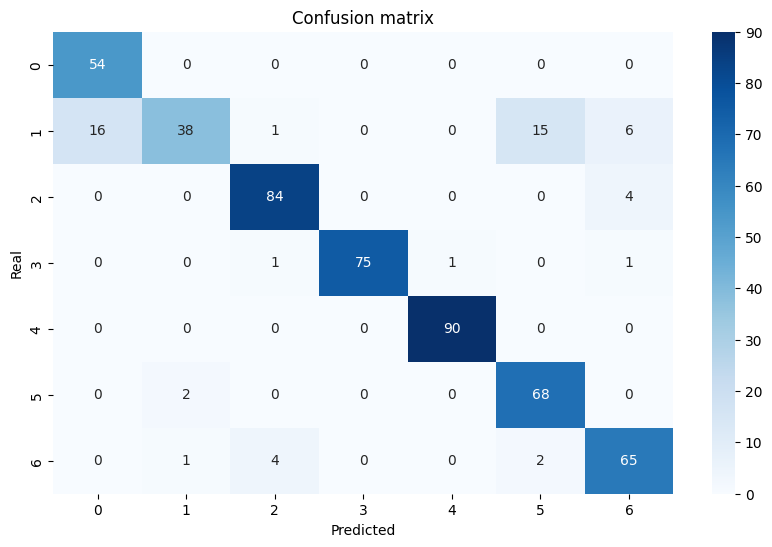

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\nTrain set:")
print(classification_report(y_train, model.predict(X_train)))

print("Test set:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

7. Find out the influence of the degree of the Minkowski metric (from 1 to 20) on the classification results. Present the results graphically.

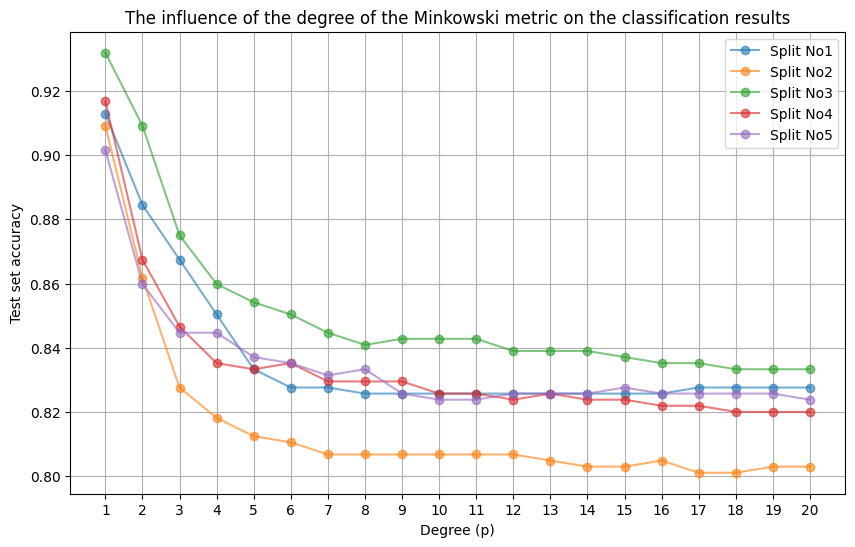

In [8]:
accuracies = []
degrees = list(range(1, 21))

for train_idx, test_idx in splits:
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    split_accuracies = []
    for p in degrees:
        knn = KNeighborsClassifier(p=p)
        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test)
        split_accuracies.append(acc)
    accuracies.append(split_accuracies)

plt.figure(figsize=(10, 6))
for i in range(len(accuracies)):
    plt.plot(degrees, accuracies[i], marker='o', alpha=0.6, label=f'Split No{i+1}')
plt.title("The influence of the degree of the Minkowski metric on the classification results")
plt.xlabel("Degree (p)")
plt.ylabel("Test set accuracy")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()